In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [21]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [16]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [17]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [18]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [19]:
# Save references to each table
Measurements = Base.classes.measurement
Stations = Base.classes.station

In [20]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [24]:
#set up inspector
inspector = inspect(engine)
inspector.get_table_names()

#get column names for 'measurement' table
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [25]:
# get column names for 'station' table
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [30]:
# Find the most recent date in the data set.
max_date = session.query(func.max(Measurements.date)).scalar()
max_date

'2017-08-23'

In [42]:
#rough work
cs = session.query(Measurements.date, Measurements.prcp)
m_df = pd.read_sql(cs.statement, cs.session.bind)
m_df

,date,prcp
0,2010-01-01,2.0
1,2010-01-02,0.0
2,2010-01-03,0.0
3,2010-01-04,0.0
4,2010-01-06,NaN
...,...,...
19545,2017-08-19,2.3
19546,2017-08-20,NaN
19547,2017-08-21,14.2
19548,2017-08-22,12.7


Text(0, 0.5, 'Inches')

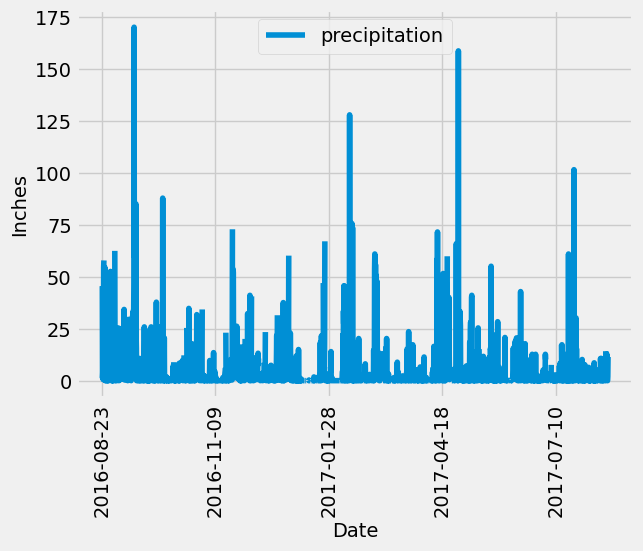

In [44]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurements.date, Measurements.prcp).filter(Measurements.date >= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")

In [46]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [47]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurements.station).distinct().count()

9

In [54]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
stations = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).\
order_by(func.count(Measurements.station).desc()).all()
stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
min_temp = session.query(func.min(Measurements.tobs)).filter(Measurements.station == 'USC00519281').scalar()
max_temp = session.query(func.max(Measurements.tobs)).filter(Measurements.station == 'USC00519281').scalar()
avg_temp = session.query(func.avg(Measurements.tobs)).filter(Measurements.station == 'USC00519281').scalar()
print(f"lowest temperature: {min_temp}, highest temperature: {max_temp}, and average temperature: {avg_temp}")

lowest temperature: 12.2, highest temperature: 29.4, and average temperature: 22.03582251082252


In [74]:
'''stations = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).\
order_by(func.count(Measurements.station)).func.max()
stations'''

'stations = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).order_by(func.count(Measurements.station)).func.max()\nstations'

In [91]:
'''results = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).all()
results'''

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [101]:
'''stations = session.query(Measurements.station, func.count(Measurements.station)).group_by(Measurements.station).\
order_by(func.count(Measurements.station).desc()).limit(1).all()
stations'''


[('USC00519281', 2772)]

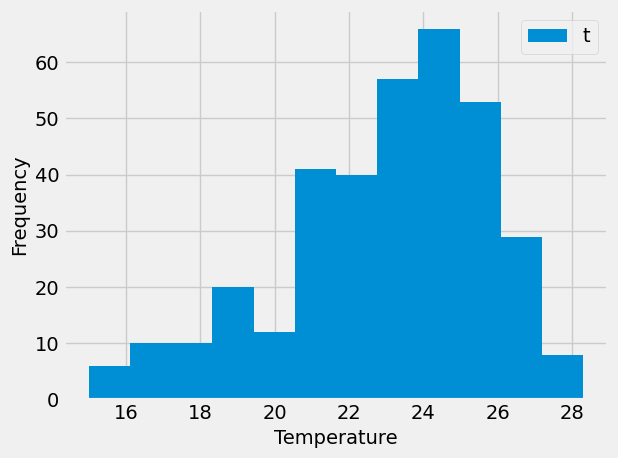

In [87]:
#prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
#results = session.query(Measurements.date, Measurements.prcp, Measurements.tobs).filter(Measurements.date >= prev_year).all()
#results

'''results = session.query(Measurements.station)\
    .group_by(Measurements.station)\
    .having(func.count(Measurements.station) == func.max(func.count(Measurements.station)))\
    .all()
results'''

results = session.query(Measurements.tobs).filter(Measurements.station == 'USC00519281').filter(Measurements.date >= '2016-08-23').all()
results
values = []
for result in results:
    values += result
plt.hist(values, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend('tobs')
plt.tight_layout()
plt.show()


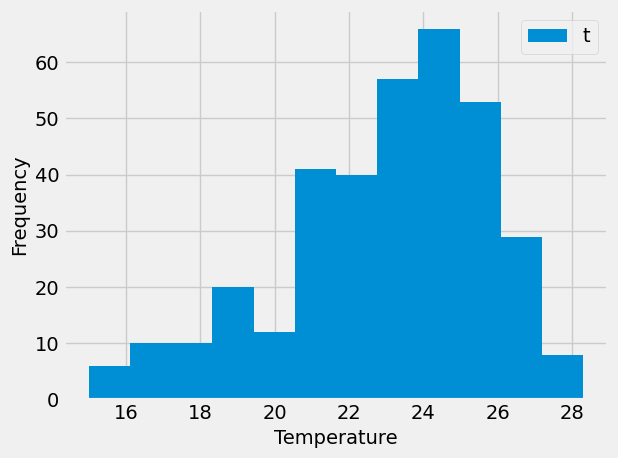

In [103]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurements.tobs).filter(Measurements.station == 'USC00519281').filter(Measurements.date >= '2016-08-23').all()
results
values = []
for result in results:
    values += result
plt.hist(values, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend('tobs')
plt.tight_layout()
plt.show()

# Close Session

In [102]:
# Close Session
session.close()